## Basic Data relation and graph

In [4]:
library(DataAnalytics)
library(data.table)
library(ggplot2)
library(lfe)
library(foreign)

### 1. Use ggplot2 to visualize the relationship between price and carat and cut. price in the dependent variable. Consider both the log() and sqrt() transformation of price.

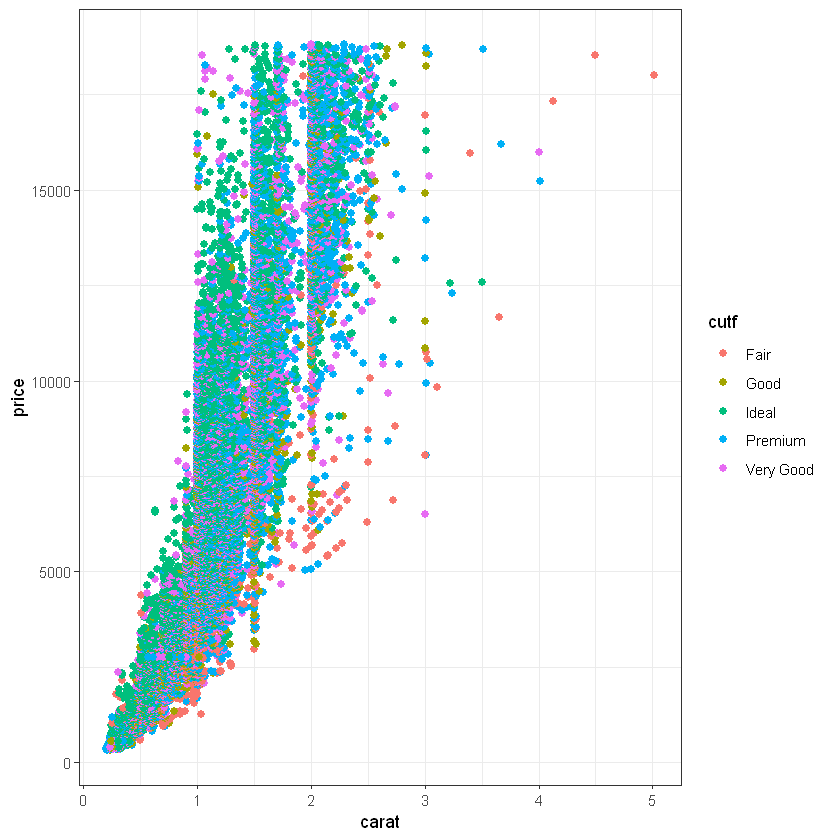

In [5]:
data(diamonds)
diamonds <- as.data.table(diamonds)
diamonds[, `:=`(cutf, as.character(cut))][, `:=`(cutf, as.factor(cutf))]
cutf <- as.character(diamonds$cut)
cutf <- as.factor(cutf)
ggplot(diamonds, aes(x = carat, y = price, color = cutf)) + geom_point(size = 2) +
theme_bw()

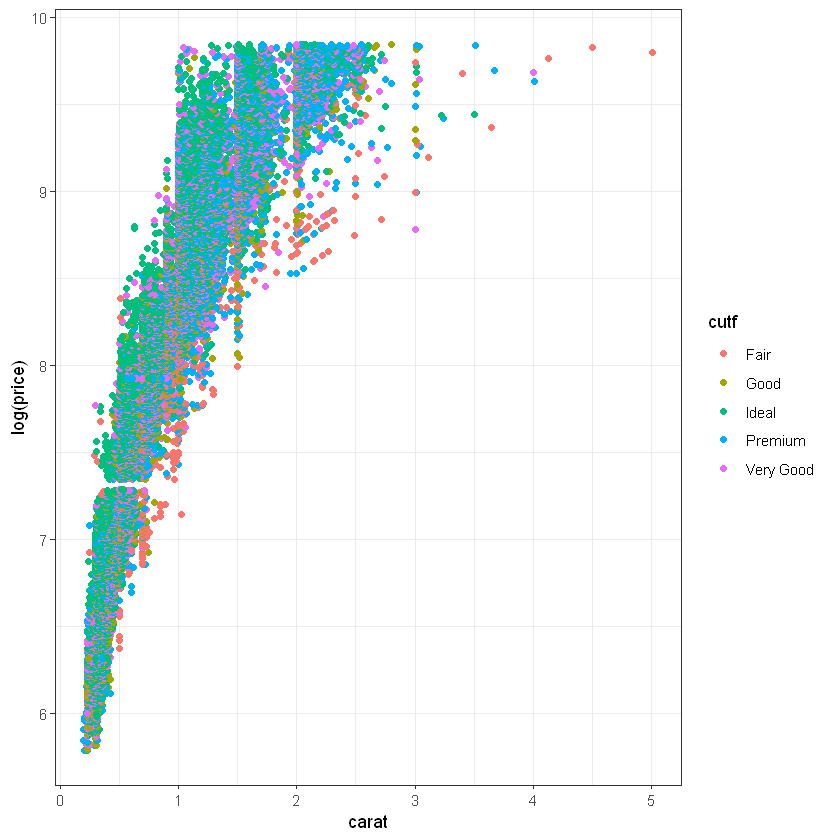

In [6]:
ggplot(diamonds, aes(x = carat, y = log(price), color = cutf)) + geom_point() +
ylab("log(price)") + theme_bw()

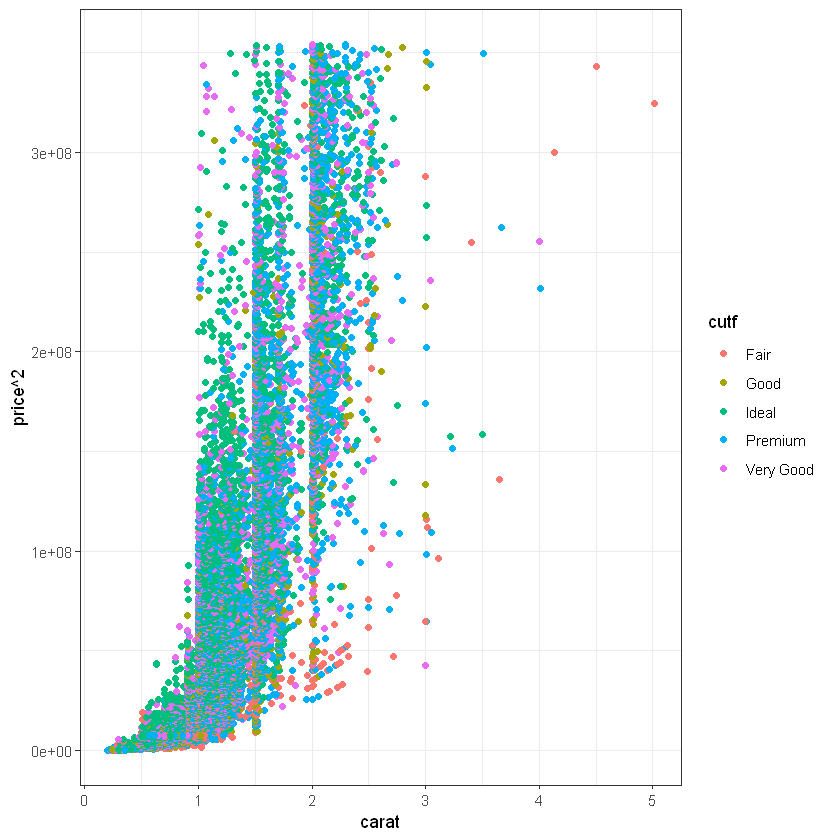

In [7]:
ggplot(diamonds, aes(x = carat, y = (price)^2, color = cutf)) + geom_point() +
ylab("price^2") + theme_bw()

### 2 Run a regression of your preferred specification. Perform residual diagnostics as you learned in 237Q,1. What do you conclude from your regression diagnostic plots of residuals vs. fitted and residuals vs. carat?

In [8]:
reg <- felm(log(price) ~ carat + cutf, data = diamonds)
summary(reg)


Call:
   felm(formula = log(price) ~ carat + cutf, data = diamonds) 

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1680 -0.2439  0.0337  0.2576  1.5651 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.01544    0.01055  570.11   <2e-16 ***
carat          1.98636    0.00365  544.16   <2e-16 ***
cutfGood       0.14058    0.01136   12.38   <2e-16 ***
cutfIdeal      0.22794    0.01027   22.19   <2e-16 ***
cutfPremium    0.16361    0.01041   15.72   <2e-16 ***
cutfVery Good  0.18146    0.01051   17.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3947 on 53934 degrees of freedom
Multiple R-squared(full model): 0.8487   Adjusted R-squared: 0.8487 
Multiple R-squared(proj model): 0.8487   Adjusted R-squared: 0.8487 
F-statistic(full model):6.052e+04 on 5 and 53934 DF, p-value: < 2.2e-16 
F-statistic(proj model): 6.052e+04 on 5 and 53934 DF, p-value: < 2.2e-16 



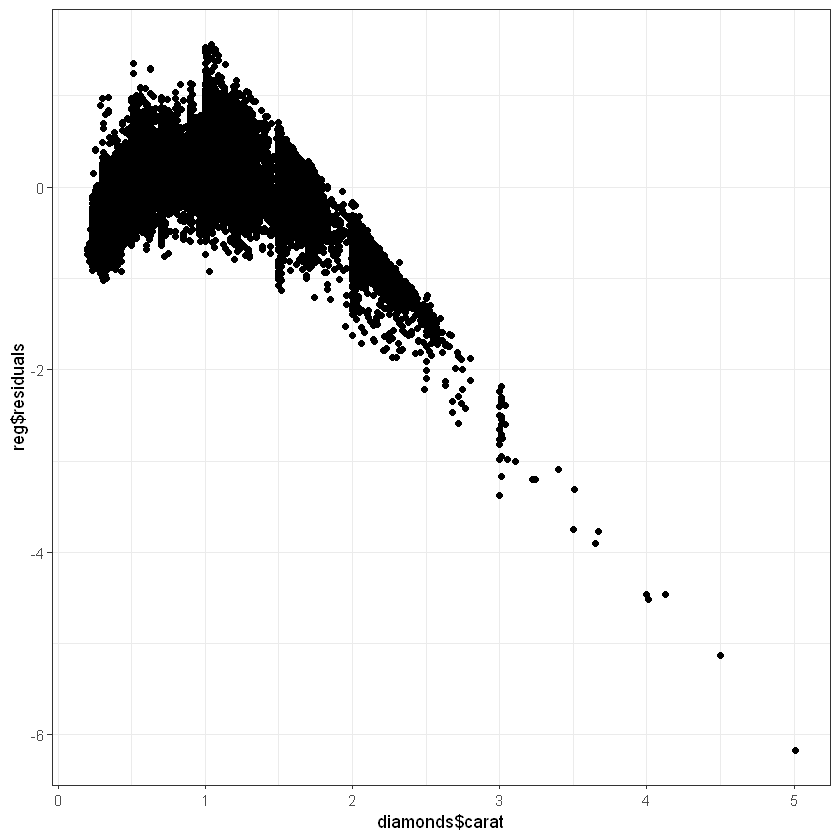

In [9]:
qplot(diamonds$carat,reg$residuals) + theme_bw()

A Normal probability plot of the residuals can be used to check the normality assumption. Here each residual
is plotted against its expected value under normality. We can also plot the histogram of residuals.

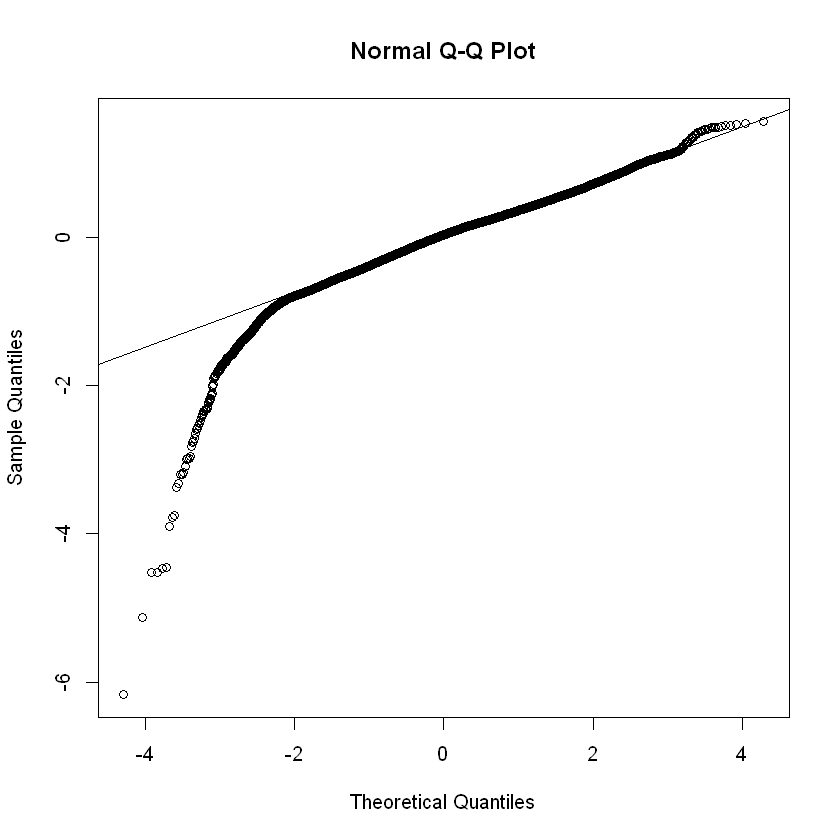

In [10]:
qqnorm(reg$residuals)
qqline(reg$residuals)

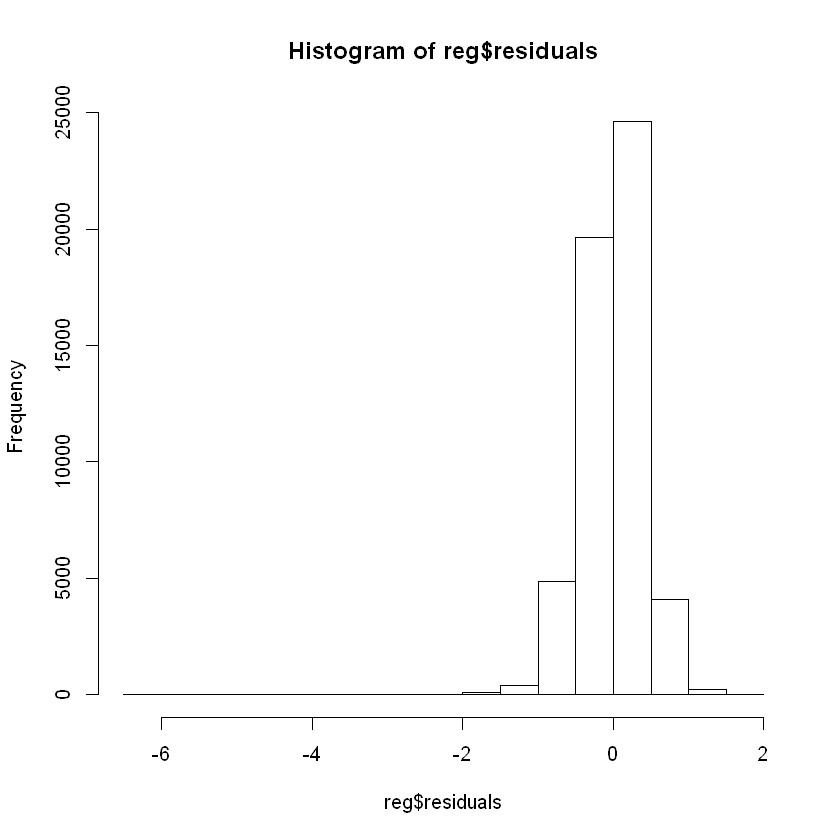

In [11]:
hist(reg$residuals, breaks = 20)